# Visualization of heart volume data
## Jacob Jonsson and Henrik von Kleist

In [1]:
import numpy as np
from numpy.random import permutation
import time
import pandas as pd
import matplotlib.pyplot as plt
fw, fh = plt.rcParams["figure.figsize"]
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import Isomap, LocallyLinearEmbedding, TSNE, SpectralEmbedding
from sklearn.metrics import silhouette_score, calinski_harabaz_score
from plot_repr import plot_repr
import umap

In [2]:
import os 

In [3]:
x = np.load('MAP583-datachallenge/data/full/X_train_cropped.npy')
y = np.load('./MAP583-datachallenge/data/full/y_train_cropped.npy')

We tried flattening the 30 time frames to one single column per patient, but realized the dimensionality reduction is consuming too many operations. Therefore, we look at one single time frame. The middle one is chosen since it is close to the maximum heart volume in theory.

In [8]:
x = x.reshape(7272,4096)

We noticed that the maximum data points were far higher than the average.

(array([2519., 3648.,  709.,  262.,   96.,   23.,    0.,    0.,    0.,
          15.]),
 array([0.00023589, 0.00314503, 0.00605417, 0.00896331, 0.01187245,
        0.01478159, 0.01769073, 0.02059987, 0.02350901, 0.02641815,
        0.02932729]),
 <a list of 10 Patch objects>)

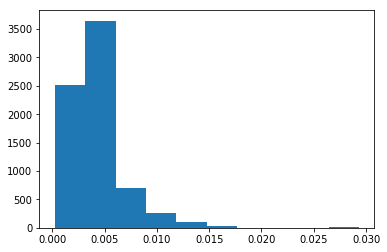

In [11]:
plt.hist(y_n[:,0])

A few outliers skews the results, so we want to exclude them. The method was taken from the following answer to a StackOverflow question: # https://stackoverflow.com/questions/11686720/is-there-a-numpy-builtin-to-reject-outliers-from-a-list

In [12]:
def reject_outliers(data, m = 3.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    keep = np.array([1 if x<m else 0 for x in s])
    return data[s<m], keep

(array([ 204.,  252.,  666., 1376., 1115., 1028.,  751.,  667.,  328.,
         197.]),
 array([0.00041416, 0.00109542, 0.00177668, 0.00245795, 0.00313921,
        0.00382047, 0.00450173, 0.005183  , 0.00586426, 0.00654552,
        0.00722678]),
 <a list of 10 Patch objects>)

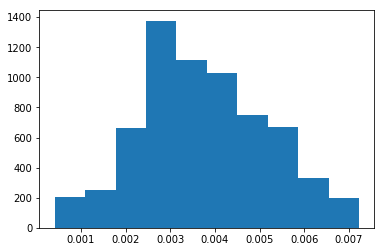

In [13]:
y, x_filt = reject_outliers(y_n[:,0])
plt.hist(y)

In [14]:
x = x[x_filt>0,:]
print(x.shape)

(6584, 4096)


We chose the UMAP method to reduce the dimensions of the data, since it yielded the most distinguishable results and is comparatively fast.

UMAP is described more thoroughly here: https://arxiv.org/pdf/1802.03426.pdf

In [15]:
X = umap.UMAP(n_neighbors=5,min_dist=0.001,metric='correlation').fit_transform(x)
#fig, ax = plot_repr(X_umap, yc, title="UMAP, Coil-20")
#plt.show()

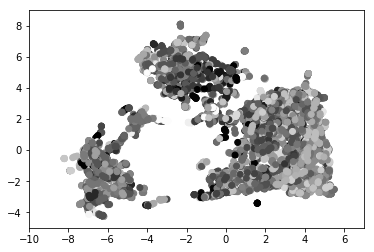

In [22]:
cm = plt.cm.get_cmap('gray')
axes = plt.gca()
axes.set_xlim([-10, 7])
axes.set_ylim([-5, 9])
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm)
plt.savefig('UMAP5.png')
plt.show()

In [23]:
X = umap.UMAP(n_neighbors=10,min_dist=0.001,metric='correlation').fit_transform(x)

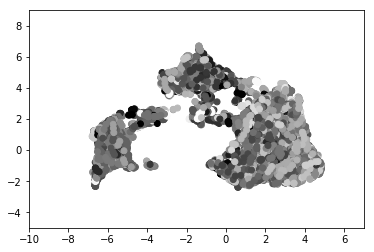

In [25]:
cm = plt.cm.get_cmap('gray')
axes = plt.gca()
axes.set_xlim([-10, 7])
axes.set_ylim([-5, 9])
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm)
plt.show()
plt.savefig('UMAP10.png')

In [28]:
X = umap.UMAP(n_neighbors=15,min_dist=0.001,metric='correlation').fit_transform(x)

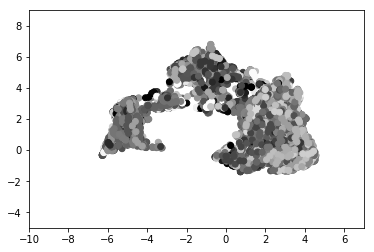

In [29]:
cm = plt.cm.get_cmap('gray')
axes = plt.gca()
axes.set_xlim([-10, 7])
axes.set_ylim([-5, 9])
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm)
plt.show()
plt.savefig('UMAP15.png')